# Importing Data

In [151]:
#Import data set and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns
%matplotlib inline

train_data = pd.read_csv("/Users/carlosalonzo/Downloads/titanic-3/train.csv")

In [152]:
#Check df
train_data.shape
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Wrangle, prepare, cleanse the data.

In [153]:
#Print missing values
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

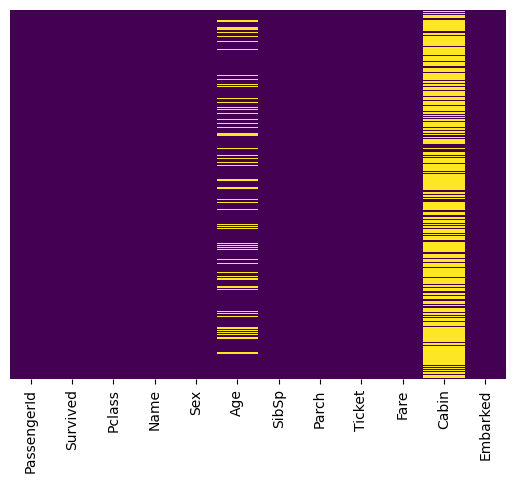

In [154]:
#Visual of missing data
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [103]:
#Replace missing data
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean()) 
train_data.drop('Cabin',axis=1 , inplace =True) 

In [104]:
#Replace gender with 0 & 1
sex = pd.get_dummies(train_data['Sex'],drop_first = True ).astype(int) 
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [105]:
#Summarize and replace embarked with 0 and 1
em= pd.get_dummies(train_data['Embarked'] ).astype(int) 
em

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [106]:
#Combine data
train_data = pd.concat([train_data,sex,em],axis = 1) 
train_data 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1,1,0,0


In [107]:
#Final data prep
train_data.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis = 1 , inplace = True ) 
train_data.rename(columns={'male':'Gender'},inplace=True)

# Logistic Regression!

In [125]:
from sklearn.model_selection import train_test_split
X = train_data.drop(columns=['Survived'])  # Features
y = train_data['Survived']  # Target variable

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train) 

/Users/carlosalonzo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [127]:
coeff_df = pd.DataFrame(train_data.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(model.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
6,C,1.248020
7,Q,0.716504
8,S,0.598725
4,Fare,0.002962
1,Age,-0.026872
3,Parch,-0.130748
2,SibSp,-0.257941
0,Pclass,-0.821826
5,Gender,-2.549541


In [109]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Model Accuracy: 0.8045

Confusion Matrix:
[[90 15]
 [20 54]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [110]:
test_data = pd.read_csv("/Users/carlosalonzo/Downloads/titanic-3/test.csv")

In [111]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [139]:
test_data = pd.read_csv("/Users/carlosalonzo/Downloads/titanic-3/test.csv")
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean()) 
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean()) 
test_data.drop('Cabin',axis=1 , inplace =True) 
sex = pd.get_dummies(test_data['Sex'],drop_first = True ).astype(int) 
sex
em= pd.get_dummies(test_data['Embarked'] ).astype(int) 
em
test_data = pd.concat([test_data,sex,em],axis = 1) 
test_data 
test_data.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis = 1 , inplace = True ) 
test_data.rename(columns={'male':'Gender'},inplace=True)
test_data

,Pclass,Age,SibSp,Parch,Fare,Gender,C,Q,S
0,3,34.50000,0,0,7.8292,1,0,1,0
1,3,47.00000,1,0,7.0000,0,0,0,1
2,2,62.00000,0,0,9.6875,1,0,1,0
3,3,27.00000,0,0,8.6625,1,0,0,1
4,3,22.00000,1,1,12.2875,0,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,1,0,0,1
414,1,39.00000,0,0,108.9000,0,1,0,0
415,3,38.50000,0,0,7.2500,1,0,0,1
416,3,30.27259,0,0,8.0500,1,0,0,1


In [140]:
X = train_data.drop(columns=['Survived'])  # Features
y = train_data['Survived']  # Target variable

# Split dataset
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model 
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(X, y) 

/Users/carlosalonzo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [141]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = model.predict(test_data)

# Add it as a new column
test_data['Survived'] = y_pred


In [142]:
test_data

,Pclass,Age,SibSp,Parch,Fare,Gender,C,Q,S,Survived
0,3,34.50000,0,0,7.8292,1,0,1,0,0
1,3,47.00000,1,0,7.0000,0,0,0,1,0
2,2,62.00000,0,0,9.6875,1,0,1,0,0
3,3,27.00000,0,0,8.6625,1,0,0,1,0
4,3,22.00000,1,1,12.2875,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,1,0,0,1,0
414,1,39.00000,0,0,108.9000,0,1,0,0,1
415,3,38.50000,0,0,7.2500,1,0,0,1,0
416,3,30.27259,0,0,8.0500,1,0,0,1,0


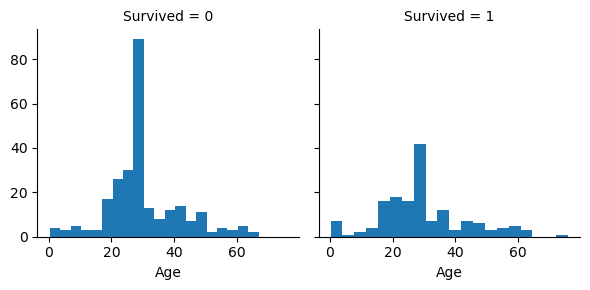

In [143]:
g = sns.FacetGrid(test_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

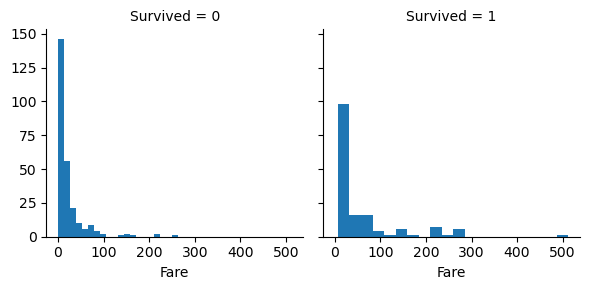

In [147]:
g = sns.FacetGrid(test_data, col='Survived')
g.map(plt.hist, 'Fare', bins=20)

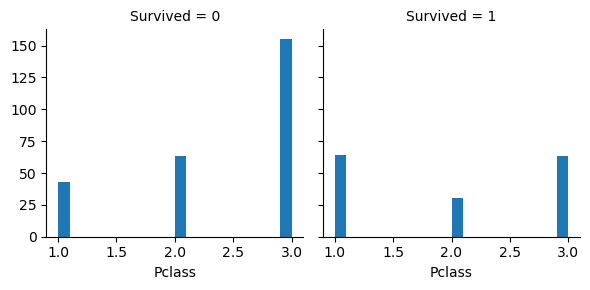

In [149]:
g = sns.FacetGrid(test_data, col='Survived')
g.map(plt.hist, 'Pclass', bins=20)

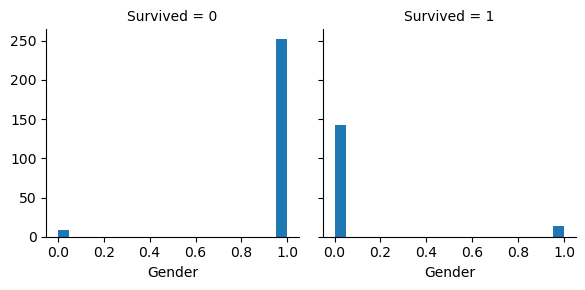

In [150]:
g = sns.FacetGrid(test_data, col='Survived')
g.map(plt.hist, 'Gender', bins=20)

In [85]:
from sklearn.tree import DecisionTreeClassifier, export_text

model = DecisionTreeClassifier()
model.fit(X_train, y_train) 

# Print tree structure
tree_text = export_text(model, feature_names=list(X_train.columns))
print(tree_text)

|--- male <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Age <= 2.50
|   |   |   |--- Parch <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- Parch >  1.50
|   |   |   |   |--- class: 0
|   |   |--- Age >  2.50
|   |   |   |--- Age <= 27.50
|   |   |   |   |--- Age <= 24.50
|   |   |   |   |   |--- Fare <= 13.40
|   |   |   |   |   |   |--- Age <= 22.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Age >  22.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Fare >  13.40
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  24.50
|   |   |   |   |   |--- Pclass <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Pclass >  1.50
|   |   |   |   |   |   |--- Fare <= 17.43
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Fare >  17.43
|   |   |   |   |   |   |   |--- Parch <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Parch >  0.50
|   |   |   |   | 